In [1]:
import time
import math
import serial
import datetime
import yagmail
from keithley import *
import numpy as np
                
# Setup communication with Keithley 2700 multimeter, starting with the following
# preamble. This ensures the setup is the same every time, regardless if it has
# been adjusted
preamble = ["*RST\n", 
            'SYST:PRES\n',
            "SYST:BEEP OFF\n",
            "TRAC:CLE\n",
            "TRAC:CLE:AUTO OFF\n",
            "INIT:CONT OFF\n",
            "TRIG:COUN 1\n",
            "FORM:ELEM READ\n"]
            
rtdCmds = ["SENS:FUNC 'TEMP',(@{chan})\n",
            "SENS:TEMP:TRAN FRTD,(@{chan})\n",
            "SENS:TEMP:FRTD:TYPE PT100,(@{chan})\n",
            "SENS:TEMP:NPLC 5,(@{chan})\n"]

thcplCmds = ["SENS:FUNC 'TEMP',(@{chan})\n",
            "SENS:TEMP:TRAN TC,(@{chan})\n",
            "SENS:TEMP:TC:TYPE K,(@{chan})\n",
            "SENS:TEMP:TC:RJUN:RSEL INT,(@{chan})\n",
            "SENS:TEMP:NPLC 5,(@{chan})\n"]

voltCmds = ["SENS:FUNC 'VOLT',(@{chan})\n",
           "SENS:VOLT:NPLC 5,(@{chan})\n",
           "SENS:VOLT:RANG 5,(@{chan})\n"]
#Channel Conversion factor
conv1= 1
conv2= 1
conv3= 1
conv4= 1
conv5= 1
conv6= 1
conv7= 1
conv8= 1
conv9= 1
conv10= 1
conv11= 1
conv12= 1
conv13= 1
conv14= 1
conv15= 1
conv16= 1
conv17= 1
conv18= 1
conv19=1

#Upper Limit
UpLim1=10
UpLim2=10
UpLim3=10
UpLim4=10
UpLim5=10
UpLim6=5
UpLim7=10
UpLim8=10
UpLim9=10
UpLim10=10
UpLim11=10
UpLim12=5
UpLim13=10
UpLim14=10
UpLim15=10
UpLim16=10
UpLim17=10
UpLim18=10
UpLim19=10

#LowerLimit
LowLim1=0
LowLim2=0
LowLim3=0
LowLim4=0
LowLim5=0
LowLim6=0
LowLim7=0
LowLim8=0
LowLim9=0
LowLim10=0
LowLim11=0
LowLim12=0
LowLim13=0
LowLim14=0
LowLim15=0
LowLim16=0
LowLim17=0
LowLim18=0
LowLim19=0

Ch1 = channel(chanNums = [101], initCmds = voltCmds, name = "Channel 1",
                    convData = lambda x: x*conv1,
                    LowLim= LowLim1,
                    UpLim= UpLim1,
                    # x*1000 chosen because the Omega temperature to voltage converters output 1 mV/C -JAG 02/12/2018 
                    #logD = "Z:/E6/TempLog/", \
                    #logDBackup = "C:/Data/TempLog2018", \
                    #errD = "C:/Data/TempLog2018", \
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 1/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 10,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")
Ch2 = channel(chanNums = [102], initCmds = voltCmds, name = "Channel 2",
                    convData = lambda x: x*conv2,
                    LowLim= LowLim2,
                    UpLim= UpLim2,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 2/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 10,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch3 = channel(chanNums = [103], initCmds = voltCmds, name = "Channel 3",
                    convData = lambda x: x*conv3,
                    LowLim= LowLim3,
                    UpLim= UpLim3,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 3/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch4 = channel(chanNums = [104], initCmds = voltCmds, name = "Channel 4",
                    convData = lambda x: x*conv4,
                    LowLim= LowLim4,
                    UpLim= UpLim4,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 4/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch5 = channel(chanNums = [105], initCmds = voltCmds, name = "Channel 5",
                    convData = lambda x: x*conv5,
                    LowLim= LowLim5,
                    UpLim= UpLim5,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 5/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch6 = channel(chanNums = [106], initCmds = voltCmds, name = "Channel 6",
                    convData = lambda x: x*conv6,
                    LowLim= LowLim6,
                    UpLim= UpLim6,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 6/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch7 = channel(chanNums = [107], initCmds = voltCmds, name = "Channel 7",
                    convData = lambda x: x*conv7,
                    LowLim= LowLim7,
                    UpLim= UpLim8,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 7/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch8 = channel(chanNums = [108], initCmds = voltCmds, name = "Channel 8",
                    convData = lambda x: x*conv8,
                    LowLim= LowLim8,
                    UpLim= UpLim8,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 8/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch9 = channel(chanNums = [109], initCmds = voltCmds, name = "Channel 9",
                    convData = lambda x: x*conv9,
                    LowLim= LowLim9,
                    UpLim= UpLim9,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 9/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch10 = channel(chanNums = [110], initCmds = voltCmds, name = "Channel 10",
                    convData = lambda x: x*conv10,
                    LowLim= LowLim10,
                    UpLim= UpLim10,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 10/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch11 = channel(chanNums = [111], initCmds = voltCmds, name = "Channel 11",
                    convData = lambda x: x*conv11,
                    LowLim= LowLim11,
                    UpLim= UpLim11,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 11/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch12 = channel(chanNums = [112], initCmds = voltCmds, name = "Channel 12",
                    convData = lambda x: x*conv12,
                    LowLim= LowLim12,
                    UpLim= UpLim12,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 12/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch13 = channel(chanNums = [113], initCmds = voltCmds, name = "Channel 13",
                    convData = lambda x: x*conv13,
                    LowLim= LowLim13,
                    UpLim= UpLim13,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 13/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch14 = channel(chanNums = [114], initCmds = voltCmds, name = "Channel 14",
                    convData = lambda x: x*conv14,
                    LowLim= LowLim14,
                    UpLim= UpLim14,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 14/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch15 = channel(chanNums = [115], initCmds = voltCmds, name = "Channel 15",
                    convData = lambda x: x*conv15,
                    LowLim= LowLim15,
                    UpLim= UpLim15,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 15/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch16 = channel(chanNums = [116], initCmds = voltCmds, name = "Channel 16",
                    convData = lambda x: x*conv16,
                    LowLim= LowLim16,
                    UpLim= UpLim16,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 16/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch17 = channel(chanNums = [117], initCmds = voltCmds, name = "Channel 17",
                    convData = lambda x: x*conv17,
                    LowLim= LowLim17,
                    UpLim= UpLim17,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 17/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch18 = channel(chanNums = [118], initCmds = voltCmds, name = "Channel 18",
                    convData = lambda x: x*conv18,
                    LowLim= LowLim18,
                    UpLim= UpLim18,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 18/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

Ch19 = channel(chanNums = [119], initCmds = voltCmds, name = "Channel 19",
                    convData = lambda x: x*conv19,
                    LowLim= LowLim19,
                    UpLim= UpLim19,
                    logD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/Channel 19/",
                    logDBackup = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/",
                    errD = "C:/Users/E5/Desktop/Allan LABVIEW/E5 Logger/KeithleyLoggerBackup/Error/",
                    logfreq = 3,
                    dateTimeStringFormat = "%Y-%m-%d, %H:%M:%S")

# Define multimeter
Channels=[Ch1, Ch2, Ch6, Ch7, Ch12, Ch19]
kmm = keithley(port = 'COM10', timeout=15, debug=False,
        channels=Channels) #SELECT CHANNELS
kmm.preamble = preamble


# This opens the serial port and initializes the multimeter
with kmm:
    # Initialize channels
    kmm.initChannels()
    print "Initialized!"
    delay = datetime.timedelta(seconds=5)

    a=[]
    Deux =[]
    while True:
#     for s in (range(2)):
#         s
        try:
            curtime = datetime.datetime.now()
            # get data
#             dat=kmm.getData(z=k)
#             dat
            if kmm.getData() == 0:
                a=[]
            else:
                a.append(1)
                a= [np.sum(a)]
            if Deux > kmm.check():
                a=[1]
            
            if (np.mod(a[0],500) <2) and (np.mod(a[0],500) >0):
                kmm.mail()
                print('Email Sent')


            Deux = kmm.check()
                
            # sleep
            while curtime + delay > datetime.datetime.now():
                time.sleep(1)
                
        except (KeyboardInterrupt, SystemExit):
            print "You hit Ctrl-C"
            break

Initialized!
2019-06-10 17:23:15: 7.97, 1.6, 8, 7.69, 8, 7.44
Converted data: [7.97187686, 1.59582472, 8.00240612, 7.69194937, 8.00240421, 7.44470596]
Prohibited Values coming from these channels: [106, 112]


C:\Users\E5\Anaconda3\envs\p-y2\lib\site-packages\ipykernel_launcher.py:320: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Email Sent
2019-06-10 17:23:20: 5.37, 4.45, 8, 7.86, 8, 7.74
Converted data: [5.36883497, 4.4511199, 8.00240707, 7.85804224, 8.00240803, 7.73626614]
Prohibited Values coming from these channels: [106, 112]
2019-06-10 17:23:25: 6.77, 6.06, 8, 8.03, 8, 7.79
Converted data: [6.7708168, 6.06297016, 8.00240517, 8.03429031, 8.00240517, 7.7858429]
Prohibited Values coming from these channels: [106, 112]
2019-06-10 17:23:31: 7.07, 6.68, 8, 8.05, 8, 7.9
Converted data: [7.07026196, 6.67512989, 8.00240421, 8.04841995, 8.00240326, 7.90357399]
Prohibited Values coming from these channels: [106, 112]
2019-06-10 17:23:37: 7.21, 6.98, 8, 8.03, 8, 7.93
Converted data: [7.21311951, 6.97766781, 8.00240612, 8.02739525, 8.00240612, 7.92983007]
Prohibited Values coming from these channels: [106, 112]
2019-06-10 17:23:42: 7.2, 7.05, 8, 8.02, 8, 7.99
Converted data: [7.19558239, 7.05249405, 8.0024128, 8.02091408, 8.00240898, 7.99169874]
Prohibited Values coming from these channels: [106, 112]
Email Sent
2019

### 

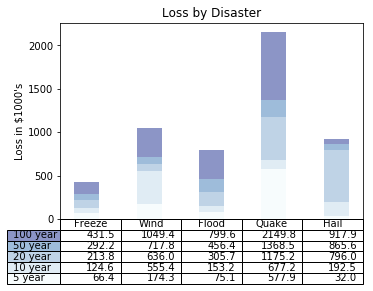

In [15]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000





# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

TypeError: object of type 'int' has no len()

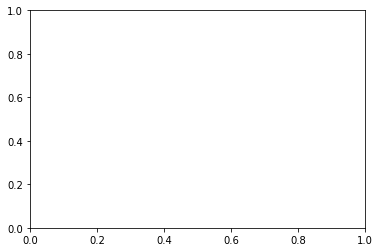

In [18]:
import matplotlib.pyplot as plt
data = [[10], [11]]
dat= [1, 2 ]
col= ('Channel',  'Current Reading')
plt.table(cellText= data, colLabels = col)

In [5]:
import threading
import time
import yagmail

data = [-1.36001492, -8.20816755, 8.00241756, 6.09667301, 3.99879885, 2.75067735, 8.00241756, 6.17676067, 4.75721121]
UL= [8, 1, 8, 8, 8, 1, 8 , 8, 8]
LL= [0,0,0,0,0,0,0,0,0]
f= False
def false():
    f= False
def email(f):
    while f is False:
        for i in range(len(data)):
            if (data[i] > UL[i]) or (data[i] < LL[i]):
                print('data', 'is reading an out of bound value of', data[i])
                receiver = "amadiaheno@berkeley.edu"
                body = yagmail.raw(channel),'is reading a prohibited value of', yagmail.raw(), 'GET BACK TO THE LAB, NOW!'


                yag = yagmail.SMTP(user='e5ultracoldberkeley1@gmail.com', password= 'superradiance', host= 'smtp.gmail.com')
                yag.send(
                to=receiver,
                subject="E5 Keithley Logger Problem",
                contents=body,
                )
                f= True
            else:
                break
    while f is True:
        Timer(3, false)
        break
                
email(f)

('data', 'is reading an out of bound value of', -1.36001492)
('data', 'is reading an out of bound value of', -8.20816755)
('data', 'is reading an out of bound value of', 8.00241756)


In [11]:
#Use this code to find which serial ports are open in your computer
import sys
import glob
import serial


def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result


if __name__ == '__main__':
    print(serial_ports())

['COM5', 'COM7', 'COM10']


EnvironmentError: Pepega

In [28]:
import visa
rm = visa.ResourceManager()
print(rm.list_resources())
inst = rm.open_resource('ASRL10::INSTR')
print(inst.query("READ?"))

(u'USB0::0x0957::0x0407::MY44051610::INSTR', u'ASRL3::INSTR', u'ASRL5::INSTR', u'ASRL6::INSTR', u'ASRL10::INSTR', u'USB0::0x1313::0x8078::P0010892::0::INSTR', u'USB0::0x1313::0x80F8::M00423432::0::INSTR')


VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [4]:
float(-1.97051108E+00)

-1.97051108

In [ ]:
import time
import yagmail

delay = datetime.timedelta(seconds=5)
a= 0
curtime = datetime.datetime.now()

while a <1:
    while curtime + delay > datetime.datetime.now():
        print('a')
#         time.sleep(0)


In [5]:
list_of_lists = [[180.0], [173.8], [164.2], [156.5], [147.2], [138.2]]
flattened = [val for sublist in list_of_lists for val in sublist]
print(flattened)

[180.0, 173.8, 164.2, 156.5, 147.2, 138.2]


In [8]:
1003%1000

3